# Homework 3

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math

import wrds
import fredapi

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox as LjungBox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
Fred_API_key_string = open('/home/william/Fred_API_key.txt').read().rstrip()

### The data you will use:

Total business inventories (seasonally adjusted numbers, monthly). 

This series is closely followed because it is a current indicator of consumer demand, and a leading indicator of businesses' forecasts of that demand.

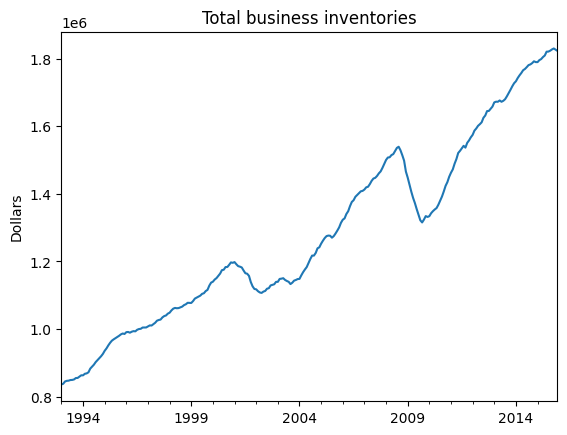

In [3]:
BUSINV = fredapi.Fred(api_key=Fred_API_key_string).get_series('BUSINV', observation_start = '1993-01-01', observation_end = '2015-12-31' )
BUSINV.index = pd.DatetimeIndex(BUSINV.index.values,freq='MS')
BUSINV.plot(title="Total business inventories",ylabel="Dollars");

We will model the growth rate of these inventories, calculated in the usual way:

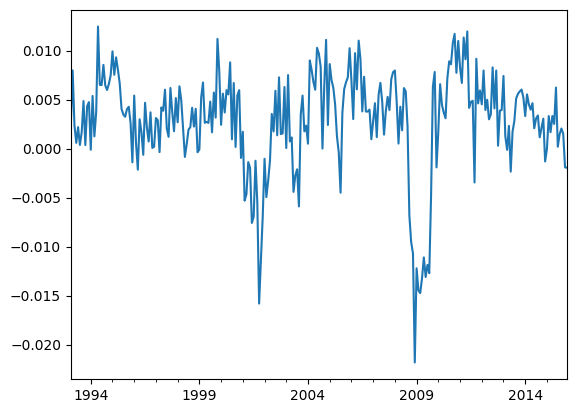

In [4]:
BUSINV_growth = np.log(BUSINV).diff().dropna()
BUSINV_growth.plot();

Save two datasets of this growth rate for use in our analysis: 
- A "training" dataset that ends in 2010. Use this to estimate and assess the models.
- A "test" dataset that runs from 2011-2015. Use this dataset to assess the out-of-sample forecasts that you make with the estimated models.

In [5]:
BUSINV_growth_training = BUSINV_growth[:'2010']

BUSINV_growth_test = BUSINV_growth['2011':'2015']

### Your task:

1. Check that the "training" data appear stationary using our usual tests.
2. Consider three models for the "training" data: AR(1), MA(1), and ARMA(1,1). Use the Box-Jenkins approach (as described in class) to select one of the three models as the best for this data.
3. For all three of the models mentioned above, plot forecasts through the end of 2015 (60 months beyond the end of the training data), along with prediction intervals at the usual 95% confidence level, and plot in the same figure the actual values in the "testing" data. 
4. What explains the different visual shapes of the forecasts? Which model seems most appropriate, just based on looking at the predictions visually? Which model performs the best in terms of RMSE during the testing period? 